# DATAWIZ TASK 3

### <font color=purple> DEFINING THE PROBLEM STATEMENT </font>
#### To understand the linear, polynomial and ridge regression algorithms, implement all 3 using sklearn/your own code in Python on the dataset provided and to predict y.

### <font color=purple> Importing required libraries </font>

In [311]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy 

### <font color=purple>Importing dataset</font>

In [312]:
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\datasets_1256_2242_train.csv")

### <font color=purple> Analyzing data </font>

In [313]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [314]:
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


### <font color=purple> Checking for missing values </font>

In [315]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### <font color=purple> Replacing missing value with median of the column </font>

In [317]:
df['y']=df['y'].replace(np.nan,df['y'].median())

In [318]:
df.isnull().sum()

x    0
y    0
dtype: int64

### <font color=purple> Checking for outliers </font>
#### <font color=brown>1. Using scatter plot </font>

Text(0.5, 1, 'x vs y')

<Figure size 1440x720 with 0 Axes>

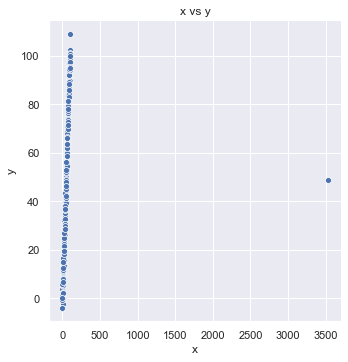

In [319]:
plt.figure(figsize=(20,10))

sns.relplot('x','y',data=df)
plt.title('x vs y')

##### <font color=red> An outlier can be spotted around x=3500 </font>
#### <font color=brown> 2. Using Z-score </font>


In [320]:
def detect_outliers(data):
    outliers=[]
    threshold=3 #if Z-score goes beyond 3 standard deviations, outlier is detected
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std #z-score formula
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers        
    

In [321]:
detect_outliers(df['x'])

[3530.15736917]

In [322]:
detect_outliers(df['y'])

[]

#### <font color=red>outlier confirmed at x=3530.14736917 <font color=red>
#### <font color=brown> Finding index of outlier </font>

In [323]:
df['x'].sort_values()

41        0.000000
614       0.000000
33        0.000000
464       0.000000
67        0.000000
          ...     
676     100.000000
269     100.000000
158     100.000000
632     100.000000
213    3530.157369
Name: x, Length: 700, dtype: float64

#### <font color=brown> Removing outlier </font>

In [324]:
df.drop(df.index[[213]], inplace=True)

In [325]:
df['x'].sort_values()

507      0.0
67       0.0
614      0.0
41       0.0
96       0.0
       ...  
676    100.0
269    100.0
158    100.0
685    100.0
298    100.0
Name: x, Length: 699, dtype: float64

### <font color=purple> Importing libraries for implementing algorithms </font>

In [326]:
#Import models from scikit learn module: 
from sklearn.linear_model import LinearRegression 
#from sklearn.cross_validation import KFold  
from sklearn.model_selection import KFold 
from sklearn import metrics 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

### <font color=purple> Defining a function for </font>  
 <font color=brown>1.Predicting values of independent variable<br/>    2.Finding Root mean Square error<br/>   3.Finding value of R-square <br/>  4.Splitting dataset for cross validation<br/>   5.Finding model accuracy</font>

In [327]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    RMSE =(metrics.mean_squared_error(predictions,data[outcome]))
    R2 = metrics.r2_score(predictions,data[outcome]) 
    print("RMSE : ",RMSE)
    print("R-squared :", R2)


    kf = KFold(5,shuffle=True)
    error = []
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

### <font color=purple> Using linear regression </font>

In [328]:
predictor_var=['x']
outcome_var=['y']
model=LinearRegression()
classification_model(model, df,predictor_var,outcome_var)

RMSE :  7.867752733487686
R-squared : 0.9906142588882534
Cross-Validation Score : 99.058%


### <font color=purple> Visualizing the line of best fit </font>

1.0006563818563041
-0.10726546430097052


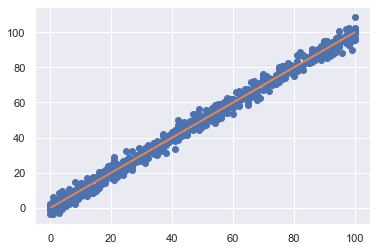

In [329]:
m, b = np.polyfit(df['x'], df['y'], 1)


print(m)
print(b)

plt.plot(df['x'], df['y'], 'o')
#create scatter plot

plt.plot(df['x'], m*df['x'] + b)

### <font color=purple> Using Polynomial Regression </font>
#### <font color=brown> Defining a function to input highest degree n </font>

In [330]:
def poly_degree(n):
    new_df=df.copy()
    for i in range(2,n+1):
        new_df['x^'+str(i)]=new_df['x']**i
    column_list=list(new_df.columns)
    

    column_list.remove(column_list[1])
    print(new_df.head())
    return new_df,column_list
       

In [331]:
poly_degree(6)
predictor_var=trial
outcome_var=['y']
model=LinearRegression()
classification_model(model, df,predictor_var,outcome_var)

      x          y     x^2       x^3         x^4           x^5           x^6
0  24.0  21.549452   576.0   13824.0    331776.0  7.962624e+06  1.911030e+08
1  50.0  47.464463  2500.0  125000.0   6250000.0  3.125000e+08  1.562500e+10
2  15.0  17.218656   225.0    3375.0     50625.0  7.593750e+05  1.139062e+07
3  38.0  36.586398  1444.0   54872.0   2085136.0  7.923517e+07  3.010936e+09
4  87.0  87.288984  7569.0  658503.0  57289761.0  4.984209e+09  4.336262e+11
RMSE :  7.867752733487686
R-squared : 0.9906142588882534
Cross-Validation Score : 99.063%


In [332]:
poly_degree(50)
predictor_var=trial
outcome_var=['y']
model=LinearRegression()
classification_model(model, df,predictor_var,outcome_var)

      x          y     x^2       x^3         x^4           x^5           x^6  \
0  24.0  21.549452   576.0   13824.0    331776.0  7.962624e+06  1.911030e+08   
1  50.0  47.464463  2500.0  125000.0   6250000.0  3.125000e+08  1.562500e+10   
2  15.0  17.218656   225.0    3375.0     50625.0  7.593750e+05  1.139062e+07   
3  38.0  36.586398  1444.0   54872.0   2085136.0  7.923517e+07  3.010936e+09   
4  87.0  87.288984  7569.0  658503.0  57289761.0  4.984209e+09  4.336262e+11   

            x^7           x^8           x^9  ...          x^41          x^42  \
0  4.586471e+09  1.100753e+11  2.641808e+12  ...  3.878474e+56  9.308338e+57   
1  7.812500e+11  3.906250e+13  1.953125e+15  ...  4.547474e+69  2.273737e+71   
2  1.708594e+08  2.562891e+09  3.844336e+10  ...  1.658600e+48  2.487900e+49   
3  1.144156e+11  4.347792e+12  1.652161e+14  ...  5.903743e+64  2.243422e+66   
4  3.772548e+13  3.282117e+15  2.855442e+17  ...  3.313518e+79  2.882761e+81   

           x^43          x^44         

### <font color=purple> Using Ridge regression </font>

In [333]:
predictor_var=['x']
outcome_var=['y']
model=Ridge()
classification_model(model, df,predictor_var,outcome_var)

RMSE :  7.867752735935635
R-squared : 0.9906142268071643
Cross-Validation Score : 99.061%


### <font color=purple>References</font>
   * https://www.youtube.com/watch?v=9lRv01HDU0s 
   * https://docs.scipy.org/doc/scipy/reference/interpolate.html 
   * https://apmonitor.com/che263/index.php/Main/PythonDataRegression 
   * https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf 
   * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV